<a href="https://colab.research.google.com/github/pranav-deo-op/HW4/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# assuming the filename is 'titanic_data.csv'
hw4_df = pd.read_csv('Week_04_HW4_Titanic_Data.csv')

# Display the first few rows
hw4_df.head()

Saving Week_04_HW4_Titanic_Data.csv to Week_04_HW4_Titanic_Data (7).csv
User uploaded file "Week_04_HW4_Titanic_Data.csv" with length 109520 bytes


,Survived,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat
0,Yes,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0.0,0.0,24160,211.3375,B5,Southampton,2
1,Yes,First,"Allison, Master. Hudson Trevor",Male,0.9167,1.0,2.0,113781,151.5500,C22 C26,Southampton,11
2,No,First,"Allison, Miss. Helen Loraine",Female,2.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN
3,No,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN
4,No,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN


In [2]:
print(hw4_df.info())
print(hw4_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Survived                            1309 non-null   object 
 1   Passenger Class                     1309 non-null   object 
 2   Name                                1309 non-null   object 
 3   Sex                                 1309 non-null   object 
 4   Age                                 1046 non-null   float64
 5   No of Siblings or Spouses on Board  1309 non-null   float64
 6   No of Parents or Children on Board  1309 non-null   float64
 7   Ticket Number                       1309 non-null   object 
 8   Passenger Fare                      1308 non-null   float64
 9   Cabin                               295 non-null    object 
 10  Port of Embarkation                 1307 non-null   object 
 11  Life Boat                           486 non

In [3]:
# Check the number of missing values in each column
hw4_df.isnull().sum()

Survived                                 1
Passenger Class                          1
Name                                     1
Sex                                      1
Age                                    264
No of Siblings or Spouses on Board       1
No of Parents or Children on Board       1
Ticket Number                            1
Passenger Fare                           2
Cabin                                 1015
Port of Embarkation                      3
Life Boat                              824
dtype: int64

In [4]:
# Drop columns with too many missing values or columns that are not relevant
hw4_df = hw4_df.drop(['Cabin', 'Life Boat'], axis=1)

In [5]:
# Replace missing age values with the mean age
hw4_df['Age'].fillna(hw4_df['Age'].mean(), inplace=True)

In [6]:
# Replace missing embarked values with the most frequent value
mode_embarked = hw4_df['Port of Embarkation'].mode()[0]
hw4_df['Port of Embarkation'].fillna(mode_embarked, inplace=True)

In [7]:
# Identify and Handle Outliers using IQR method
numerical_columns = ['Age', 'No of Siblings or Spouses on Board', 'No of Parents or Children on Board', 'Passenger Fare']
Q1 = hw4_df[numerical_columns].quantile(0.25)
Q3 = hw4_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [8]:
# Remove outliers from the dataset
hw4_df = hw4_df[~((hw4_df[numerical_columns] < lower_bound) | (hw4_df[numerical_columns] > upper_bound)).any(axis=1)]

In [9]:
# Data Transformation
hw4_df['Survived'] = hw4_df['Survived'].astype('category')  # Convert 'Survived' column to categorical type
hw4_df['Passenger Class'] = hw4_df['Passenger Class'].astype('category')  # Convert 'Passenger Class' column to categorical type
hw4_df['Sex'] = hw4_df['Sex'].astype('category')  # Convert 'Sex' column to categorical type

In [10]:
# Data Transformation - One-Hot Encoding
df_encoded = pd.get_dummies(hw4_df, columns=['Port of Embarkation'], drop_first=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[['Age', 'Passenger Fare']] = scaler.fit_transform(df_encoded[['Age', 'Passenger Fare']])

In [12]:
hw4_df['FamilySize'] = hw4_df['No of Siblings or Spouses on Board'] + hw4_df['No of Parents or Children on Board']

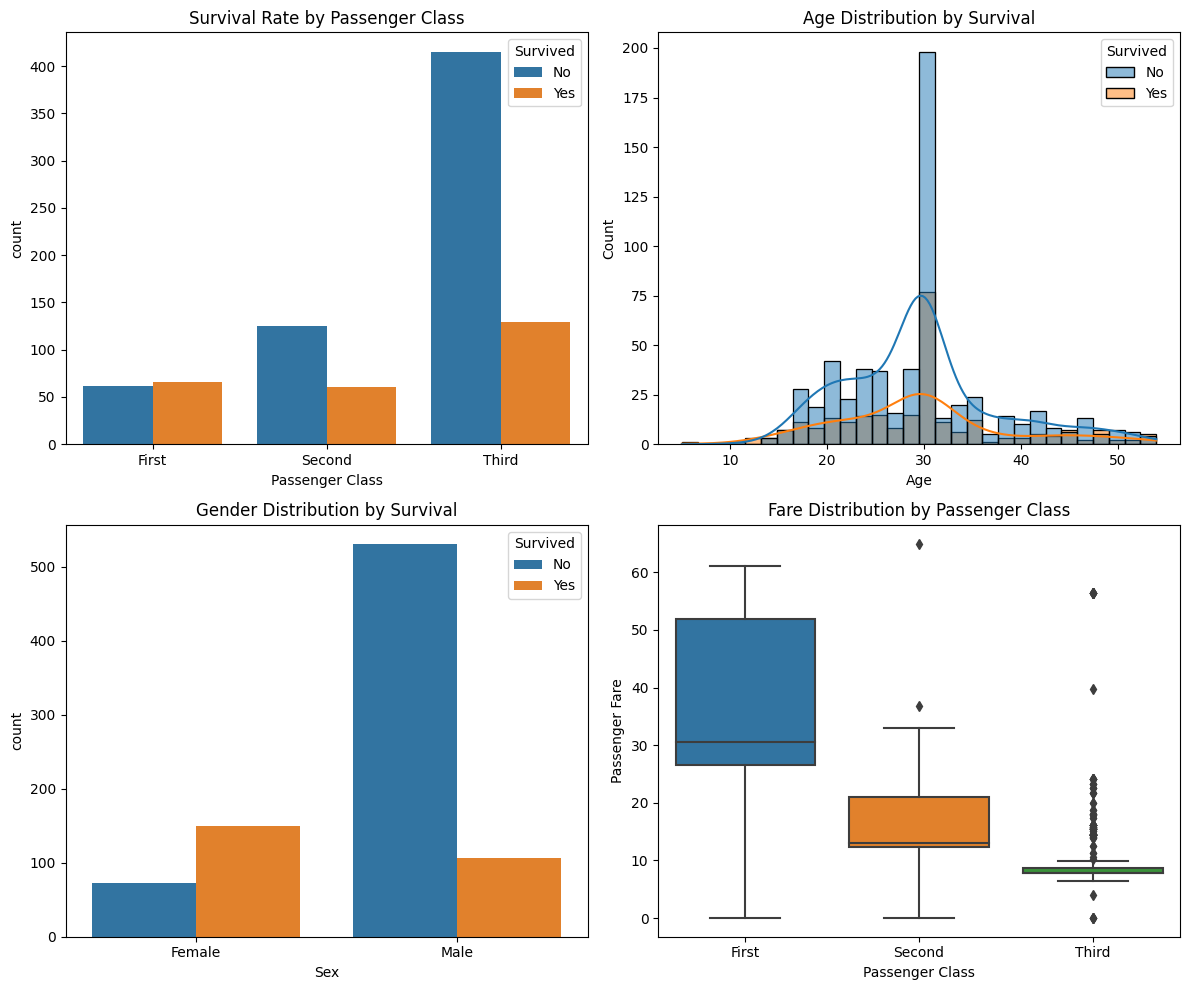

In [13]:
# Data Exploration and Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Survival Rate by Passenger Class
ax1 = axes[0, 0]
sns.countplot(x='Passenger Class', hue='Survived', data=hw4_df, ax=ax1)
ax1.set_title('Survival Rate by Passenger Class')

# Age Distribution by Survival
ax2 = axes[0, 1]
sns.histplot(data=hw4_df, x='Age', hue='Survived', kde=True, ax=ax2)
ax2.set_title('Age Distribution by Survival')

# Gender Distribution by Survival
ax3 = axes[1, 0]
sns.countplot(x='Sex', hue='Survived', data=hw4_df, ax=ax3)
ax3.set_title('Gender Distribution by Survival')

# Fare Distribution by Passenger Class
ax4 = axes[1, 1]
sns.boxplot(x='Passenger Class', y='Passenger Fare', data=hw4_df, ax=ax4)
ax4.set_title('Fare Distribution by Passenger Class')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
# Save the Transformed Dataset
df_encoded.to_csv('hw4_titanic_transformed.csv', index=False)

In [15]:
from google.colab import files

files.download('hw4_titanic_transformed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>